Api call from website coinmarketcap.com

In [171]:
#code to call the api from coinmarketcap.com
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'IND'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '5d97b4e5-781a-48e4-8ff9-6bdef101d49d',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-05-09T12:05:35.578Z', 'error_code': 0, 'error_message': None, 'elapsed': 47, 'credit_count': 1, 'notice': None, 'total_count': 9902}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11027, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [28]:
type(data)

dict

In [38]:
import pandas as pd

pd.set_option('display.max_columns',None)#this allows us to see all the columns

In [39]:
pd.json_normalize(data['status'])

,timestamp,error_code,error_message,elapsed,credit_count,notice,total_count
0,2024-05-09T06:00:04.669Z,0,None,85,1,None,9901


In [41]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.IND.price,quote.IND.volume_24h,quote.IND.volume_change_24h,quote.IND.percent_change_1h,quote.IND.percent_change_24h,quote.IND.percent_change_7d,quote.IND.percent_change_30d,quote.IND.percent_change_60d,quote.IND.percent_change_90d,quote.IND.market_cap,quote.IND.market_cap_dominance,quote.IND.fully_diluted_market_cap,quote.IND.tvl,quote.IND.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11026,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969578e+07,1.969578e+07,False,NaN,1,NaN,NaN,None,2024-05-09T05:59:00.000Z,1.168198e+09,4.749596e+14,-0.7911,0.147869,-1.625487,7.221888,-13.301531,-11.363736,33.110246,2.300858e+16,53.1407,2.453216e+16,None,2024-05-09T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 12:00:20.597905
1,1027,Ethereum,ETH,ethereum,8905,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201052e+08,1.201052e+08,True,NaN,2,NaN,NaN,None,2024-05-09T05:58:00.000Z,5.702030e+07,2.159836e+14,-0.3344,0.442389,-0.620734,3.257683,-18.483430,-23.796747,22.620557,6.848437e+15,15.8150,6.848437e+15,None,2024-05-09T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 12:00:20.597905
2,825,Tether USDt,USDT,tether,84946,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.109560e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-09T05:58:00.000Z,1.895780e+04,8.648525e+14,1.8181,-0.001545,-0.034440,0.035143,-0.048971,-0.227477,-0.024084,2.103481e+15,4.8575,2.143872e+15,None,2024-05-09T05:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-09 12:00:20.597905
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475871e+08,1.475871e+08,False,NaN,4,NaN,NaN,None,2024-05-09T05:58:00.000Z,1.135070e+07,3.297327e+13,11.4765,0.450395,2.379196,9.415611,2.588823,21.121897,86.476976,1.675217e+15,3.8697,1.675217e+15,None,2024-05-09T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 12:00:20.597905
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.481422e+08,5.755430e+08,True,NaN,5,NaN,NaN,None,2024-05-09T05:58:00.000Z,2.741774e+06,4.608460e+13,-3.2921,0.512764,-1.802179,11.760658,-18.805199,-2.171232,37.777036,1.228705e+15,2.8381,1.578009e+15,None,2024-05-09T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 12:00:20.597905
5,3408,USDC,USDC,usd-coin,18983,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.308806e+10,3.308806e+10,False,NaN,6,NaN,NaN,None,2024-05-09T05:58:00.000Z,1.896765e+04,9.971178e+13,-2.6478,-0.002149,-0.000845,-0.010752,0.007869,0.021273,0.003596,6.276028e+14,1.4497,6.276028e+14,None,2024-05-09T05:58:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-09 12:00:20.597905
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,None,2024-05-09T05:59:00.000Z,9.908506e+03,1.936380e+13,-11.7879,0.270750,0.109376,2.072002,-15.290038,-16.179542,0.802625,5.485268e+14,1.2669,9.908506e+14,None,2024-05-09T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 12:00:20.597905
7,74,Dogecoin,DOGE,dogecoin,963,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.442152e+11,1.442152e+11,True,NaN,8,NaN,NaN,None,2024-05-09T05:59:00.000Z,2.807565e+03,2.160005e+13,5.6994,0.592205,-1.366517,17.744754,-25.940854,-16.570894,83.441276,4.048936e+14,0.9353,4.048936e+14,None,2024-05-09T05:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-09 12:00:20.597905
8,11419,Toncoin,TON,toncoin,312,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-l

data cleaning and transformation

In [45]:
df.isnull()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.IND.price,quote.IND.volume_24h,quote.IND.volume_change_24h,quote.IND.percent_change_1h,quote.IND.percent_change_24h,quote.IND.percent_change_7d,quote.IND.percent_change_30d,quote.IND.percent_change_60d,quote.IND.percent_change_90d,quote.IND.market_cap,quote.IND.market_cap_dominance,quote.IND.fully_diluted_market_cap,quote.IND.tvl,quote.IND.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,False
1,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,False
2,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,False
5,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,False
7,False,False,False,False,False,False,False,True,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,False
8,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,False
9,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,True,False


In [172]:
df.dropna(axis=1,inplace=True)
pd.set_option('display.float_format', lambda x: '%.5f' % x)#changing the foemat of display of market value
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,circulating_supply,total_supply,infinite_supply,cmc_rank,last_updated,quote.IND.price,quote.IND.volume_24h,quote.IND.volume_change_24h,quote.IND.percent_change_1h,quote.IND.percent_change_24h,quote.IND.percent_change_7d,quote.IND.percent_change_30d,quote.IND.percent_change_60d,quote.IND.percent_change_90d,quote.IND.market_cap,quote.IND.market_cap_dominance,quote.IND.fully_diluted_market_cap,quote.IND.last_updated,timestamp
0,1,Bitcoin,BTC,bitcoin,11026,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",19695781.00000,19695781.00000,False,1,2024-05-09T05:59:00.000Z,1168198280.57890,474959616562714.12500,-0.79110,0.14787,-1.62549,7.22189,-13.30153,-11.36374,33.11025,23008577498858536.00000,53.14070,24532163892156948.00000,2024-05-09T05:58:00.000Z,2024-05-09 12:00:20.597905
1,1027,Ethereum,ETH,ethereum,8905,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",120105242.69584,120105242.69584,True,2,2024-05-09T05:58:00.000Z,57020297.59052,215983603908095.96875,-0.33440,0.44239,-0.62073,3.25768,-18.48343,-23.79675,22.62056,6848436680698694.00000,15.81500,6848436680698613.00000,2024-05-09T05:58:00.000Z,2024-05-09 12:00:20.597905
2,825,Tether USDt,USDT,tether,84946,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",110955976510.79590,113086550461.08403,True,3,2024-05-09T05:58:00.000Z,18957.80072,864852499927430.87500,1.81810,-0.00155,-0.03444,0.03514,-0.04897,-0.22748,-0.02408,2103481291886468.50000,4.85750,2143872288264815.50000,2024-05-09T05:58:00.000Z,2024-05-09 12:00:20.597905
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",147587103.25370,147587103.25370,False,4,2024-05-09T05:58:00.000Z,11350698.14584,32973268568557.97266,11.47650,0.45039,2.37920,9.41561,2.58882,21.12190,86.47698,1675216659252302.00000,3.86970,1675216659252209.75000,2024-05-09T05:58:00.000Z,2024-05-09 12:00:20.597905
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",448142241.99027,575542997.14966,True,5,2024-05-09T05:58:00.000Z,2741774.37001,46084599997517.07031,-3.29210,0.51276,-1.80218,11.76066,-18.80520,-2.17123,37.77704,1228704913207562.25000,2.83810,1578009038423384.00000,2024-05-09T05:58:00.000Z,2024-05-09 12:00:20.597905
5,3408,USDC,USDC,usd-coin,18983,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",33088064923.71405,33088064923.71405,False,6,2024-05-09T05:58:00.000Z,18967.64827,99711776872018.34375,-2.64780,-0.00215,-0.00084,-0.01075,0.00787,0.02127,0.00360,627602777296582.37500,1.44970,627602777296618.62500,2024-05-09T05:58:00.000Z,2024-05-09 12:00:20.597905
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",55359176420.00000,99987633657.00000,False,7,2024-05-09T05:59:00.000Z,9908.50636,19363797795509.94922,-11.78790,0.27075,0.10938,2.07200,-15.29004,-16.17954,0.80263,548526751697910.18750,1.26690,990850636101074.37500,2024-05-09T05:58:00.000Z,2024-05-09 12:00:20.597905
7,74,Dogecoin,DOGE,dogecoin,963,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",144215216383.70520,144215216383.70520,True,8,2024-05-09T05:59:00.000Z,2807.56501,21600052950534.48047,5.69940,0.59221,-1.36652,17.74475,-25.94085,-16.57089,83.44128,404893594930955.93750,0.93530,404893594930978.31250,2024-05-09T05:58:00.000Z,2024-05-09 12:00:20.597905
8,11419,Toncoin,TON,toncoin,312,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",3473431002.23669,5106350278.33006,True,9,2024-05-09T05:58:00.000Z,112295.85801,3859471571024.97168,16.76400,0.43804,2.74961,25.48435,-12.44845,106.97989,186.21171,390051914629064.68750,0.90090,573421985796426.50000,2024-05-09T05:58:00.000Z,2024-05-09 12:00:20.597905
9,2010,Cardano,ADA,cardano,1163,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",35661664510.96300,368553240

In [139]:
#sorting the cryptocurrencies by the market value cap
df_sorted = df.sort_values(by='quote.IND.market_cap', ascending=False)
#finding out the top 5 cryptocurrencies
df2 = df_sorted.head(5).drop(df_sorted[df_sorted['name'] == 'Others'].index)
df2

,id,name,symbol,slug,num_market_pairs,date_added,tags,circulating_supply,total_supply,infinite_supply,cmc_rank,last_updated,quote.IND.price,quote.IND.volume_24h,quote.IND.volume_change_24h,quote.IND.percent_change_1h,quote.IND.percent_change_24h,quote.IND.percent_change_7d,quote.IND.percent_change_30d,quote.IND.percent_change_60d,quote.IND.percent_change_90d,quote.IND.market_cap,quote.IND.market_cap_dominance,quote.IND.fully_diluted_market_cap,quote.IND.last_updated,timestamp
0,1,Bitcoin,BTC,bitcoin,11026,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",19695781.00000,19695781.00000,False,1,2024-05-09T05:59:00.000Z,1168198280.57890,474959616562714.12500,-0.79110,0.14787,-1.62549,7.22189,-13.30153,-11.36374,33.11025,23008577498858536.00000,53.14070,24532163892156948.00000,2024-05-09T05:58:00.000Z,2024-05-09 12:00:20.597905
1,1027,Ethereum,ETH,ethereum,8905,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",120105242.69584,120105242.69584,True,2,2024-05-09T05:58:00.000Z,57020297.59052,215983603908095.96875,-0.33440,0.44239,-0.62073,3.25768,-18.48343,-23.79675,22.62056,6848436680698694.00000,15.81500,6848436680698613.00000,2024-05-09T05:58:00.000Z,2024-05-09 12:00:20.597905
2,825,Tether USDt,USDT,tether,84946,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",110955976510.79590,113086550461.08403,True,3,2024-05-09T05:58:00.000Z,18957.80072,864852499927430.87500,1.81810,-0.00155,-0.03444,0.03514,-0.04897,-0.22748,-0.02408,2103481291886468.50000,4.85750,2143872288264815.50000,2024-05-09T05:58:00.000Z,2024-05-09 12:00:20.597905
3,1839,BNB,BNB,bnb,2154,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",147587103.25370,147587103.25370,False,4,2024-05-09T05:58:00.000Z,11350698.14584,32973268568557.97266,11.47650,0.45039,2.37920,9.41561,2.58882,21.12190,86.47698,1675216659252302.00000,3.86970,1675216659252209.75000,2024-05-09T05:58:00.000Z,2024-05-09 12:00:20.597905
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",448142241.99027,575542997.14966,True,5,2024-05-09T05:58:00.000Z,2741774.37001,46084599997517.07031,-3.29210,0.51276,-1.80218,11.76066,-18.80520,-2.17123,37.77704,1228704913207562.25000,2.83810,1578009038423384.00000,2024-05-09T05:58:00.000Z,2024-05-09 12:00:20.597905


DATA VISUALISATION

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

Bar plot representing the value of top 5 crytpo currencies of india


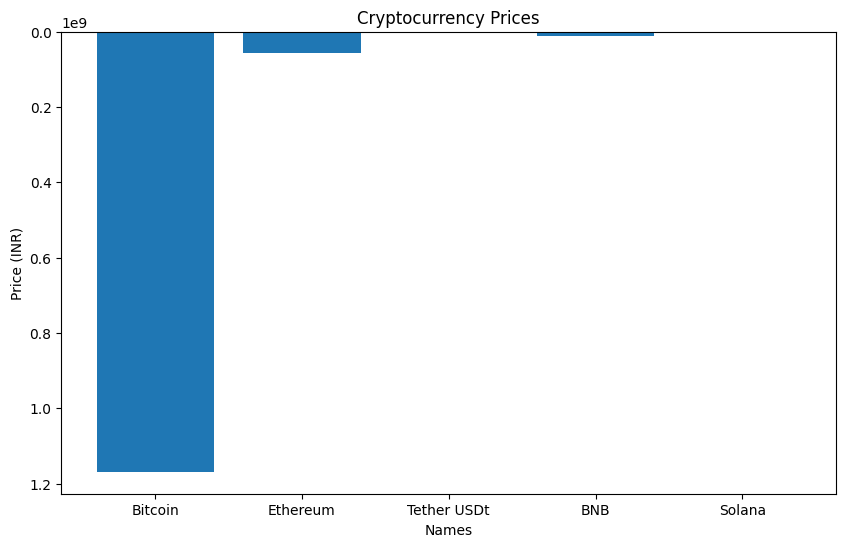

In [145]:
plt.figure(figsize=(10, 6))
plt.bar(df2['name'],df_topten['quote.IND.price'])
plt.ylabel('Price (INR)')
plt.xlabel('Names')
plt.title('Cryptocurrency Prices')
plt.gca().invert_yaxis() 

Distribution of cryptocurrency market in india using pie chart


([<matplotlib.patches.Wedge at 0x27f69007c70>,
 [Text(-0.21379064868511946, -1.0790243549312482, 'Bitcoin'),
  Text(0.6629253063947149, 0.87779840404359, 'Ethereum'),
  Text(-0.17495141603764341, 1.08599815931079, 'Tether USDt'),
  Text(-0.5275842127020154, 0.9652227196391487, 'BNB'),
  Text(-0.7593543492307019, 0.7958523558452394, 'Solana')],
 [Text(-0.11661308110097424, -0.5885587390534079, '66.0%'),
  Text(0.36159562166984444, 0.4787991294783217, '19.6%'),
  Text(-0.09542804511144184, 0.5923626323513399, '6.0%'),
  Text(-0.287773206928372, 0.5264851198031719, '4.8%'),
  Text(-0.4141932813985646, 0.43410128500649414, '3.5%')])

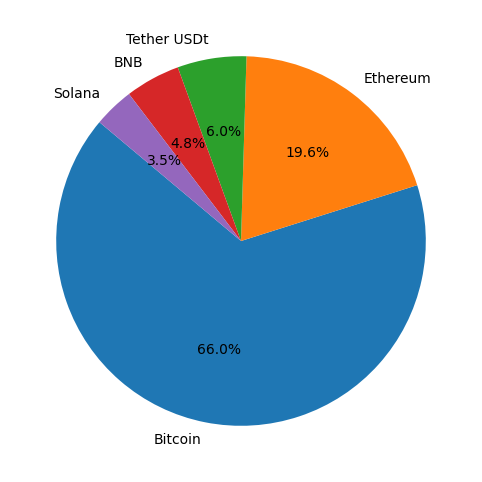

In [155]:
plt.figure(figsize=(8, 6))

plt.pie(df2['quote.IND.market_cap_dominance'],labels=df2['name'],autopct='%1.1f%%',shadow=False,startangle=140)

In [167]:
df3 = df2.groupby('name', sort=False)[['quote.IND.percent_change_24h','quote.IND.percent_change_7d','quote.IND.percent_change_30d','quote.IND.percent_change_60d','quote.IND.percent_change_90d']].mean()
df3

,quote.IND.percent_change_24h,quote.IND.percent_change_7d,quote.IND.percent_change_30d,quote.IND.percent_change_60d,quote.IND.percent_change_90d
name,,,,,
Bitcoin,-1.62549,7.22189,-13.30153,-11.36374,33.11025
Ethereum,-0.62073,3.25768,-18.48343,-23.79675,22.62056
Tether USDt,-0.03444,0.03514,-0.04897,-0.22748,-0.02408
BNB,2.37920,9.41561,2.58882,21.12190,86.47698
Solana,-1.80218,11.76066,-18.80520,-2.17123,37.77704


In [168]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.IND.percent_change_24h    -1.62549
             quote.IND.percent_change_7d      7.22189
             quote.IND.percent_change_30d   -13.30153
             quote.IND.percent_change_60d   -11.36374
             quote.IND.percent_change_90d    33.11025
Ethereum     quote.IND.percent_change_24h    -0.62073
             quote.IND.percent_change_7d      3.25768
             quote.IND.percent_change_30d   -18.48343
             quote.IND.percent_change_60d   -23.79675
             quote.IND.percent_change_90d    22.62056
Tether USDt  quote.IND.percent_change_24h    -0.03444
             quote.IND.percent_change_7d      0.03514
             quote.IND.percent_change_30d    -0.04897
             quote.IND.percent_change_60d    -0.22748
             quote.IND.percent_change_90d    -0.02408
BNB          quote.IND.percent_change_24h     2.37920
             quote.IND.percent_change_7d      9.41561
             quote.IND.percent_change_30

In [173]:
#changes the stack back to the dataframe
df5 = df4.to_frame(name='values')
# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
#renaming the level 1 column to percentage change
df7 = df6.rename(columns={'level_1': 'percent_change'})
#renaming all the other columns for better visibility in the pie graph
df7['percent_change'] = df7['percent_change'].replace(['quote.IND.percent_change_24h','quote.IND.percent_change_7d','quote.IND.percent_change_30d','quote.IND.percent_change_60d','quote.IND.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,24h,-1.62549
1,Bitcoin,7d,7.22189
2,Bitcoin,30d,-13.30153
3,Bitcoin,60d,-11.36374
4,Bitcoin,90d,33.11025
5,Ethereum,24h,-0.62073
6,Ethereum,7d,3.25768
7,Ethereum,30d,-18.48343
8,Ethereum,60d,-23.79675
9,Ethereum,90d,22.62056


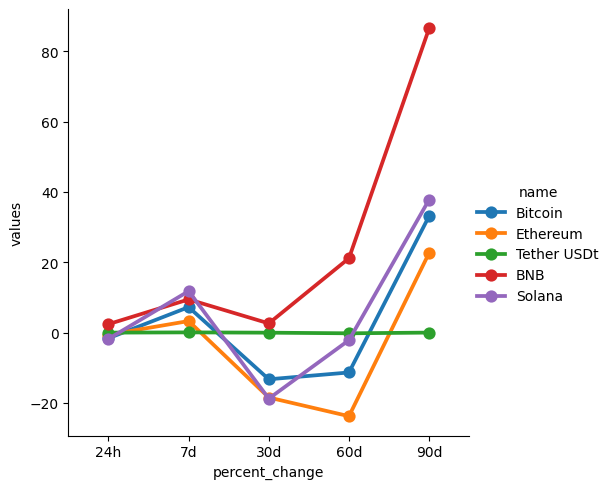

In [170]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')